# Chargement des Modules utiles 

In [1]:
# Modules usuels de python

import os
import pandas as pd 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modules pour le machine learning :

## Prétraitement des données

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

## Pour la réduction de dimensions

from sklearn.decomposition import PCA # méthode de réduction par analyse des composantes principales 
from sklearn.preprocessing import StandardScaler

## Modèles de machine learning

from sklearn.neighbors import KNeighborsClassifier


# TRAVAIL 1 : Traitement de la base de données MNIST

## Question 1 : chargement des données

In [2]:
path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/TP1_KNN/Donnees_knn'

try:
    df_train = pd.read_csv(path+'/mnist_train.csv',header=None)
    df_test = pd.read_csv(path+'/mnist_test.csv',header=None)
except FileNotFoundError:
    print(f"Changer le chemin {path}")

In [6]:
df_train.head(4)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Question 2 : Chargement des données 

In [3]:
X_train = df_train.drop(columns=0,axis=1) #features train
Y_train = df_train[0] # target train 

X_val = df_test.drop(columns=0,axis=1) # features test
Y_val = df_test[0] #target test

print(f"shape train = {X_train.shape} and shape validation = {X_val.shape}")

shape train = (60000, 784) and shape validation = (10000, 784)


## Question 3 : affichage des données sous forme d'image 

choisir un entier entre 0 et 599996


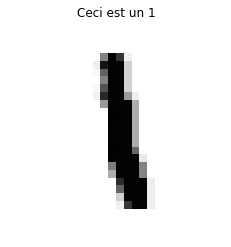

In [4]:
i = int(input('choisir un entier entre 0 et 59999'))
plt.imshow(X_train.iloc[i].values.reshape((28,28)),cmap='Greys') #permets de remettre sous une forme matricielle
plt.axis('off') #pas d'axe
plt.title(f"Ceci est un {Y_train.iloc[i]}")
plt.show()



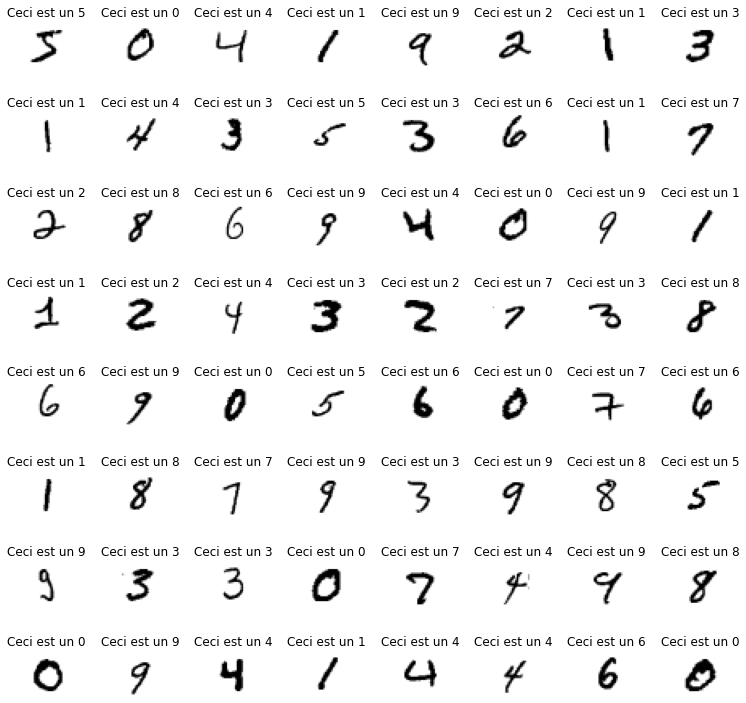

In [16]:
# Créez une figure et une grille de sous-graphiques
fig, axes = plt.subplots(8, 8, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train.iloc[i].values.reshape((28, 28)), cmap='gray_r')
    ax.set_title(f"Ceci est un {Y_train.iloc[i]}")
    ax.axis('off')

# Ajustez l'espacement entre les sous-graphiques si nécessaire
plt.tight_layout(h_pad=2,w_pad=5)

# Affichez la figure
plt.show()
    
    

## Question 4 : split train test 

In [4]:
n = 12000
r = 1200

npr.seed(0) #Avoir un aléa défini au préalable si besoin 

Dn = df_train.sample(n) #choisir n lignes sur le dataset train 

X = Dn.drop(columns=0,axis=1) 
Y = Dn[0]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=r/n,random_state=0) # Split in a train and a test sets


#### Equilibre des classes target

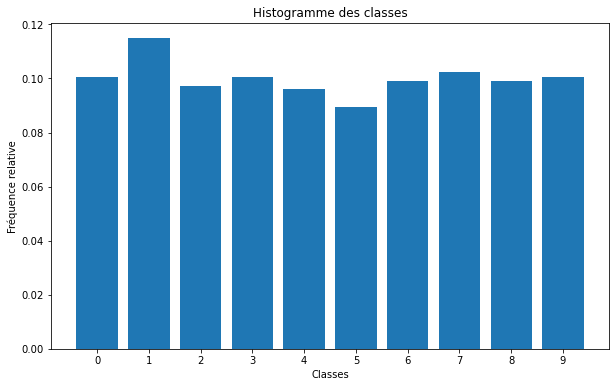

In [7]:
## Vérification de la taille des classes 

E = [Y[Y==i].count()/len(Y) for i in Y.unique()]

#print(np.array(E)/len(Y),'\n\n Les classes semblent équilibrées\n\n')

# Utilisez la fonction zip pour associer les éléments des deux listes et créez un dictionnaire
dictionnaire = dict(zip(Y.unique(), E))

keys = np.sort(list(dictionnaire.keys()))

values = [dictionnaire[key] for key in keys]


# Créez un histogramme
plt.figure(figsize=(10, 6))
plt.bar(keys, values)
plt.xlabel('Classes')
plt.ylabel('Fréquence relative')
plt.title('Histogramme des classes')
plt.xticks(keys)  # Afficher toutes les classes sur l'axe des x
plt.show()


Le classes semblent plutôt équilibrées, la métrique accuracy peut être employée comme indicateur de performance sur nos futures modèles de classification.

# Question 5-6 : un modèle naïf

In [11]:
n_neighbors = 10 #paramètre du nombre de voisins
knn10 = KNeighborsClassifier(n_neighbors=10,metric='euclidean') #initialiser le modèle
knn10.fit(x_train,y_train) #entrainement du modèle


KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [12]:
y_pred_test = knn10.predict(x_test)
y_pred_train = knn10.predict(x_train)

print(f"accuracy_score(y_pred_train,y_train) = {accuracy_score(y_pred_train,y_train)}")
print(f"accuracy_score(y_pred_test,y_test) = {accuracy_score(y_pred_test,y_test)}")


accuracy_score(y_pred_train,y_train) = 0.9548148148148148
accuracy_score(y_pred_test,y_test) = 0.9541666666666667


Pour un modèle mathématiques relativement simple tel que un K_plus proche voisins nous arrivons à un score de 95\% ce qui est déjà une bonne performance.

### Matrice de confusion 

Text(0.5, 1.0, 'Confusion Matrix')

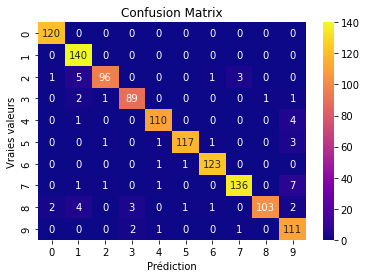

In [13]:
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True, fmt="d", cmap="plasma")

# Ajouter des étiquettes
plt.xlabel('Prédiction')
plt.ylabel('Vraies valeurs')
plt.title('Confusion Matrix')


#### Où sont les erreurs sur le test set ?

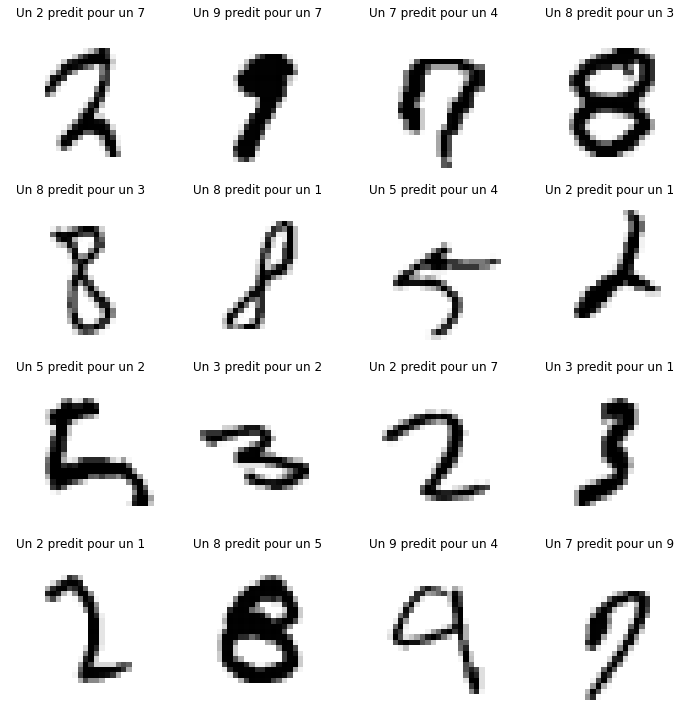

In [72]:
x_faux = x_test.loc[y_pred_test!=y_test] # Boolean indexing pour trouver les indices faux 
y_pred_faux = y_pred_test[y_pred_test!=y_test]
y_faux = y_test.loc[y_pred_test!=y_test]


# Créez une figure et une grille de sous-graphiques
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_faux.iloc[i].values.reshape((28, 28)), cmap='gray_r')
    ax.axis('off')
    ax.set_title(f"Un {y_faux.iloc[i]} predit pour un {y_pred_faux[i]} ")# {y_pred_faux[i]} 

# Ajustez l'espacement entre les sous-graphiques si nécessaire
plt.tight_layout(h_pad=1,w_pad=1)

# Affichez la figure
plt.show()

# Partie personnelle de recherche

## GridSearchCV

La cross validation est une méthode permettant d'éviter le sur apprentissage sur les données train. En effet, nous partageons les données train en plusieurs sous échantillons et nous trouvons un score moyen à l'aide des sous échatillons tests à la fin. Cette méthode permet de brasser les données pour garder une certaine généralité. 


Version Chat GPT :

La validation croisée implique de diviser l'ensemble de données d'apprentissage en plusieurs sous-échantillons, généralement appelés "plis" (folds). Le modèle est ensuite entraîné sur une partie de ces plis (l'ensemble d'entraînement) et évalué sur le reste des plis (l'ensemble de validation ou de test). Ce processus est répété plusieurs fois, en utilisant chaque fois un pli différent comme ensemble de validation, et en calculant finalement une mesure de performance moyenne à partir de toutes les évaluations.

La validation croisée aide à estimer de manière plus fiable la performance d'un modèle sur des données non vues et à éviter que le modèle soit trop spécifique aux données d'apprentissage, ce qui réduirait sa capacité à généraliser sur de nouvelles données. Cela peut être particulièrement utile pour éviter le surapprentissage (overfitting) lorsque le modèle est trop complexe et s'adapte trop précisément aux données d'entraînement.

In [14]:
parm_grid = {'n_neighbors':np.arange(1,20,2),
             'metric':['euclidean','manhattan','nan_euclidean']} # Initialisation d'une grille de paramètres 

grid = GridSearchCV(KNeighborsClassifier(),parm_grid, cv=5,scoring='accuracy') #cv pour cross validation avec 5 partitions, tournante sur 4 train et 1 pour test 

grid.fit(x_train,y_train) #Clic bouton pour l'entrainement du modèle 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'nan_euclidean'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='accuracy')

In [15]:
print("Les meilleurs paramètres:\n",grid.best_params_)

best_model = grid.best_estimator_
print("best score  données train= ", best_model.score(x_train,y_train))
print("best score  données test = ", best_model.score(x_test,y_test))

Les meilleurs paramètres:
 {'metric': 'euclidean', 'n_neighbors': 1}
best score  données train=  1.0
best score  données test =  0.9533333333333334


On voit que le modèle fait de l'overfitting sur les données train car il y a un score de 100\% de réussite sur les données train et un score de 95\% sur les données test. 

Taux d'erreur de classification sur les données test = 0.04666666666666667


Text(0.5, 1.0, 'Confusion Matrix')

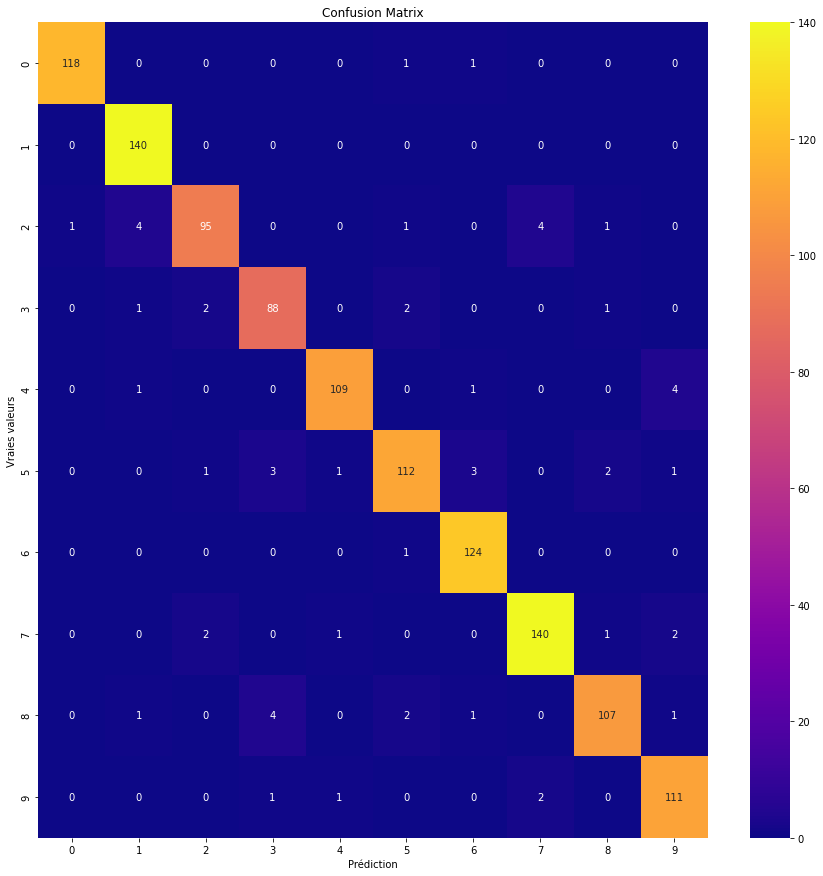

In [17]:
y_pred_test = best_model.predict(x_test)

taux_err = len(y_pred_test[y_pred_test != y_test])/len(y_pred_test)

print(f"Taux d'erreur de classification sur les données test = {taux_err}")

plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True, fmt="d", cmap="plasma")

# Ajouter des étiquettes
plt.xlabel('Prédiction')
plt.ylabel('Vraies valeurs')
plt.title('Confusion Matrix')

# Et avec une ACP ?

In [5]:
scaler = StandardScaler()
scaler.fit(X)

X= scaler.transform(X) #Pour normaliser

pca = PCA(n_components=0.9) ## Acp sur le 10 première composante 
pca.fit(X)
x_pca = pca.transform(X)


In [8]:
xa_train,xa_test,ya_train,ya_test = train_test_split(x_pca,Y,test_size=r/n)

In [13]:
parm_grid = {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(),parm_grid, cv=5,verbose=4)

grid.fit(xa_train,ya_train) 


Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.855 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.863 total time=   0.1s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.856 total time=   0.1s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.862 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.861 total time=   0.1s
[CV 1/5] END ...metric=euclidean, n_neighbors=2;, score=0.852 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=2;, score=0.857 total time=   0.2s
[CV 3/5] END ...metric=euclidean, n_neighbors=2;, score=0.851 total time=   0.2s
[CV 4/5] END ...metric=euclidean, n_neighbors=2;, score=0.854 total time=   0.2s
[CV 5/5] END ...metric=euclidean, n_neighbors=2;, score=0.854 total time=   0.1s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.876 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=3

[CV 2/5] END ...metric=manhattan, n_neighbors=2;, score=0.849 total time=   0.2s
[CV 3/5] END ...metric=manhattan, n_neighbors=2;, score=0.843 total time=   0.3s
[CV 4/5] END ...metric=manhattan, n_neighbors=2;, score=0.850 total time=   0.3s
[CV 5/5] END ...metric=manhattan, n_neighbors=2;, score=0.844 total time=   0.4s
[CV 1/5] END ...metric=manhattan, n_neighbors=3;, score=0.873 total time=   0.3s
[CV 2/5] END ...metric=manhattan, n_neighbors=3;, score=0.871 total time=   0.3s
[CV 3/5] END ...metric=manhattan, n_neighbors=3;, score=0.860 total time=   0.3s
[CV 4/5] END ...metric=manhattan, n_neighbors=3;, score=0.868 total time=   0.4s
[CV 5/5] END ...metric=manhattan, n_neighbors=3;, score=0.867 total time=   0.4s
[CV 1/5] END ...metric=manhattan, n_neighbors=4;, score=0.878 total time=   0.3s
[CV 2/5] END ...metric=manhattan, n_neighbors=4;, score=0.878 total time=   0.3s
[CV 3/5] END ...metric=manhattan, n_neighbors=4;, score=0.866 total time=   0.3s
[CV 4/5] END ...metric=manha

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             verbose=4)

In [15]:
print("Les meilleurs paramètres:\n",grid.best_params_)

model = grid.best_estimator_
print("best score  données train= ", model.score(xa_train,ya_train))
print("best score  données test = ", model.score(xa_test,ya_test))

Les meilleurs paramètres:
 {'metric': 'euclidean', 'n_neighbors': 12}
best score  données train=  0.9030555555555555
best score  données test =  0.8991666666666667


Le score est moins bon mais le temps de calculs est beaucoup plus rapide. 


Somme cumulée de la proportions de variance expliquée :

[0.05975014 0.10204828 0.1409307  0.17162723 0.19832792 0.22122729
 0.24119042 0.25920471 0.27539423 0.29015217]


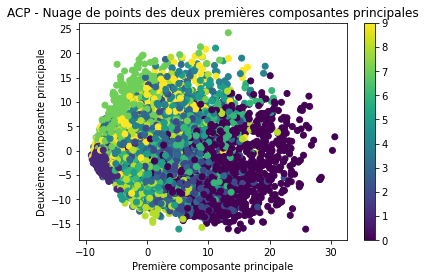

In [18]:
print(f"\nSomme cumulée de la proportions de variance expliquée :\n\n{pca.explained_variance_ratio_.cumsum()}")

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=Y)

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('ACP - Nuage de points des deux premières composantes principales')
plt.colorbar()
plt.show()


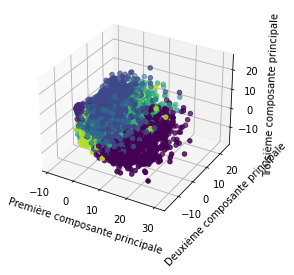

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_pca[:, 0], x_pca[:, 1],x_pca[:, 2],marker='o', c=Y)


ax.set_xlabel('Première composante principale')
ax.set_ylabel('Deuxième composante principale')
ax.set_zlabel('Troisième composante principale')

plt.show()


La part de variance expliquée n'est pas très significative, nous sommes à moins de 23 \% de variance expliquée lorsque l'on cumule les trois premières composantes principales. Nous ne voyons pas non plus un clustering marquant des images en fonction du nombre associé.

# Et UMAP ?

UMAP : "Uniform Manifold Approximation and Projection" est une technique d'apprentissage non supervisé utilisée pour la réduction de dimensionnalité et la visualisation de données. Cette méthode de réduction de dimension est utilisée dans le but de garder la sctructure toplologie des points initiaux présents dans l'espace de grange dimension. 

In [23]:
import umap 

In [50]:
reducer = umap.UMAP(n_neighbors=50, min_dist=0.01, n_components=5)
embedding = reducer.fit_transform(X)


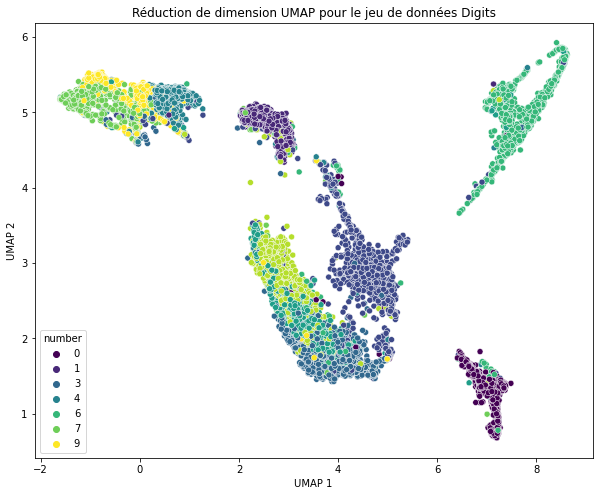

In [51]:
# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'UMAP 1': embedding[:, 0], 'UMAP 2': embedding[:, 1], 'number': Y})

# Visualisation des données réduites avec UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP 1', y='UMAP 2', hue='number', data=df, palette='viridis')
plt.title('Réduction de dimension UMAP pour le jeu de données Digits')
plt.show()

In [65]:
x_train,x_test,y_train,y_test = train_test_split(embedding,Y,test_size=r/n,random_state=0)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=r/n,random_state=0)

In [53]:
parm_grid = {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(),parm_grid, cv=5,verbose = 4)
#cv pour cross validation avec 5 partitions, tournante sur 4 train et 1 pour test 
# parm_grid dico pour les tests 
grid.fit(x_train,y_train) 

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.861 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.869 total time=   0.1s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.869 total time=   0.1s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.869 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.874 total time=   0.1s
[CV 1/5] END ...metric=euclidean, n_neighbors=2;, score=0.864 total time=   0.0s
[CV 2/5] END ...metric=euclidean, n_neighbors=2;, score=0.865 total time=   0.0s
[CV 3/5] END ...metric=euclidean, n_neighbors=2;, score=0.880 total time=   0.1s
[CV 4/5] END ...metric=euclidean, n_neighbors=2;, score=0.873 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=2;, score=0.863 total time=   0.0s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.881 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=3

[CV 4/5] END ...metric=manhattan, n_neighbors=2;, score=0.875 total time=   0.1s
[CV 5/5] END ...metric=manhattan, n_neighbors=2;, score=0.863 total time=   0.1s
[CV 1/5] END ...metric=manhattan, n_neighbors=3;, score=0.881 total time=   0.1s
[CV 2/5] END ...metric=manhattan, n_neighbors=3;, score=0.887 total time=   0.1s
[CV 3/5] END ...metric=manhattan, n_neighbors=3;, score=0.893 total time=   0.1s
[CV 4/5] END ...metric=manhattan, n_neighbors=3;, score=0.893 total time=   0.1s
[CV 5/5] END ...metric=manhattan, n_neighbors=3;, score=0.887 total time=   0.1s
[CV 1/5] END ...metric=manhattan, n_neighbors=4;, score=0.880 total time=   0.1s
[CV 2/5] END ...metric=manhattan, n_neighbors=4;, score=0.888 total time=   0.1s
[CV 3/5] END ...metric=manhattan, n_neighbors=4;, score=0.893 total time=   0.1s
[CV 4/5] END ...metric=manhattan, n_neighbors=4;, score=0.893 total time=   0.1s
[CV 5/5] END ...metric=manhattan, n_neighbors=4;, score=0.884 total time=   0.1s
[CV 1/5] END ...metric=manha

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             verbose=4)

In [66]:
print("Les meilleurs paramètres:\n",grid.best_params_)

model = grid.best_estimator_
print("best score  données train= ", model.score(x_train,y_train))
print("best score  données test = ", model.score(x_test,y_test))

Les meilleurs paramètres:
 {'metric': 'euclidean', 'n_neighbors': 7}
best score  données train=  0.9075925925925926
best score  données test =  0.9066666666666666
